<a href="https://colab.research.google.com/github/Basmala86/FashionMNIST_SimpleNN/blob/main/Assignment2_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

100%|██████████| 26.4M/26.4M [00:01<00:00, 21.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 344kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.28MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 20.4MB/s]


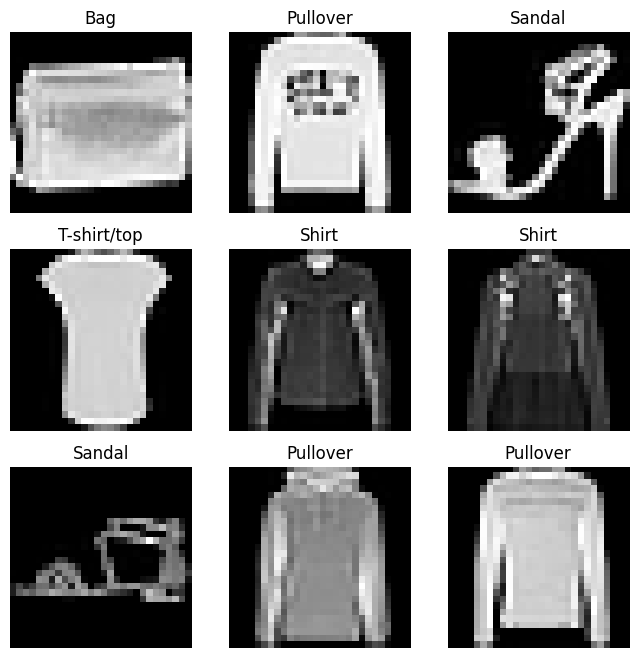

In [3]:
def show_samples():
    images, labels = next(iter(train_loader))
    plt.figure(figsize=(8,8))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.show()

show_samples()

In [4]:
class FashionNN(nn.Module):
    def __init__(self):
        super(FashionNN, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        return self.model(x)

model = FashionNN()
print(model)

FashionNN(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
epochs = 8
train_losses, train_accuracies, test_accuracies = [], [], []

for epoch in range(epochs):
    model.train()
    correct, total, running_loss = 0, 0, 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    train_accuracies.append(train_acc)

    model.eval()
    correct_test, total_test = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)
    test_acc = 100 * correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%")

Epoch [1/8] - Loss: 0.5208, Train Acc: 81.44%, Test Acc: 84.70%
Epoch [2/8] - Loss: 0.3722, Train Acc: 86.56%, Test Acc: 86.24%
Epoch [3/8] - Loss: 0.3311, Train Acc: 87.84%, Test Acc: 87.40%
Epoch [4/8] - Loss: 0.3090, Train Acc: 88.62%, Test Acc: 86.84%
Epoch [5/8] - Loss: 0.2902, Train Acc: 89.22%, Test Acc: 87.47%
Epoch [6/8] - Loss: 0.2763, Train Acc: 89.72%, Test Acc: 88.04%
Epoch [7/8] - Loss: 0.2605, Train Acc: 90.17%, Test Acc: 88.02%
Epoch [8/8] - Loss: 0.2512, Train Acc: 90.68%, Test Acc: 87.43%


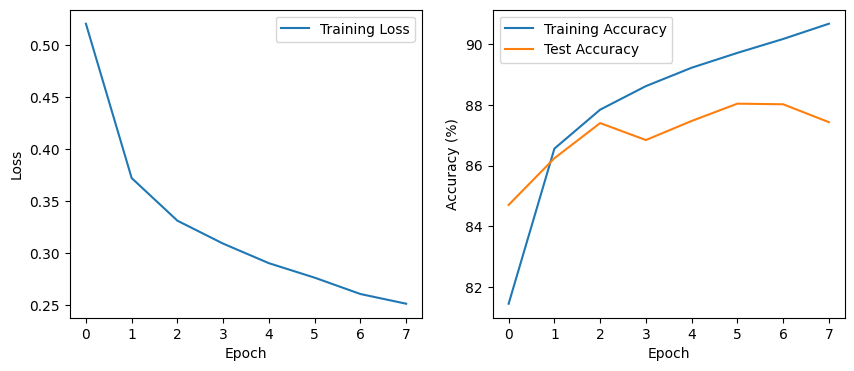

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

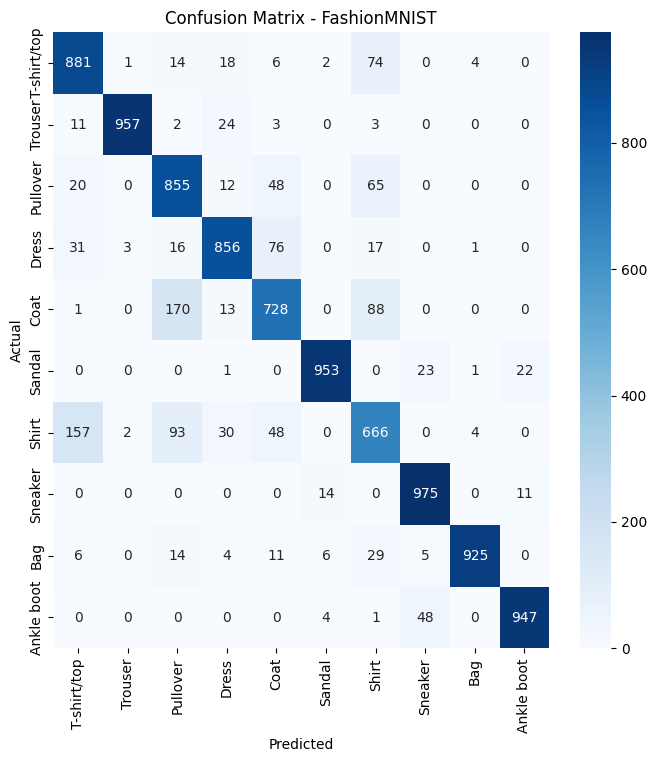

In [8]:
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - FashionMNIST')
plt.show()

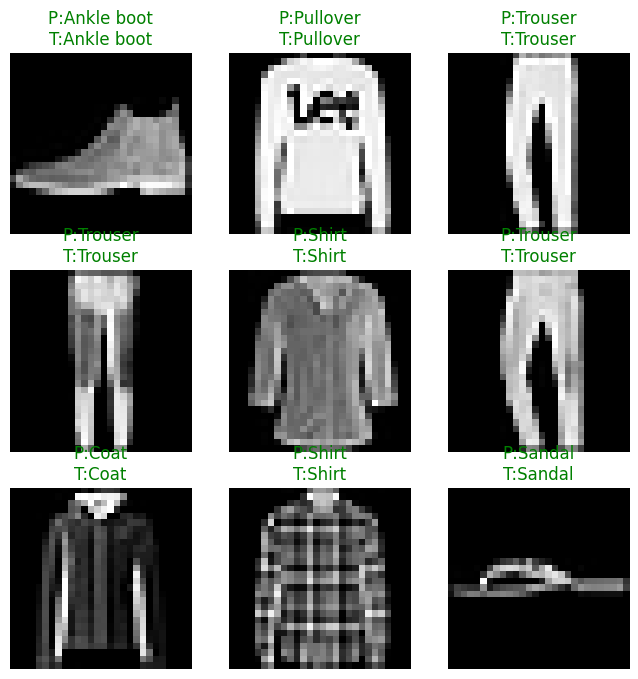

In [9]:
def show_predictions(n=9):
    images, labels = next(iter(test_loader))
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    plt.figure(figsize=(8,8))
    for i in range(n):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i][0], cmap='gray')
        color = 'green' if preds[i]==labels[i] else 'red'
        plt.title(f"P:{classes[preds[i]]}\nT:{classes[labels[i]]}", color=color)
        plt.axis('off')
    plt.show()

show_predictions()

In [10]:
print("✅ Training Completed!")
print(f"Final Training Accuracy: {train_accuracies[-1]:.2f}%")
print(f"Final Test Accuracy: {test_accuracies[-1]:.2f}%")

print("""
Conclusion:
The simple neural network achieved over 85% accuracy on Fashion-MNIST.
It effectively classified images into 10 clothing categories using two ReLU layers.
Increasing epochs or adding dropout could improve performance further.
""")

✅ Training Completed!
Final Training Accuracy: 90.68%
Final Test Accuracy: 87.43%

Conclusion:
The simple neural network achieved over 85% accuracy on Fashion-MNIST.
It effectively classified images into 10 clothing categories using two ReLU layers.
Increasing epochs or adding dropout could improve performance further.

